<a href="https://colab.research.google.com/github/Waleedprw22/Work_Public/blob/main/Visitor_Detection_Waleed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# YOLOv8 Tracking and Counting

---

[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/OS5qI9YBkfk)
[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/yolov8-tracking-and-counting/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/roboflow/notebooks)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **23.01.2023** with version **YOLOv8.0.17**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Tracking and Counting, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Download video
- Install YOLOv8
- Install ByteTrack
- Install Roboflow Supervision
- Tracking utils
- Load pre-trained YOLOv8 model
- Predict and annotate single frame
- Predict and annotate whole video

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed May 24 03:09:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Download video

In [ ]:
%cd {HOME}
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-" -O vehicle-counting.mp4 && rm -rf /tmp/cookies.txt
#import gdown

#url = 'https://drive.google.com/file/d/1URFRckchPGkjVupjKlvFb6wOMFeT0c6T/view?usp=sharing'
#output = 'store_camera.mp4'

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1URFRckchPGkjVupjKlvFb6wOMFeT0c6T' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1URFRckchPGkjVupjKlvFb6wOMFeT0c6T" -O store_camera.mp4 && rm -rf /tmp/cookies.txt
#!wget -O store_camera.mp4 "https://drive.google.com/uc?export=download&id=1URFRckchPGkjVupjKlvFb6wOMFeT0c6T"

#gdown.download(url, output, quiet=False)

/content
--2023-05-24 01:44:42--  https://docs.google.com/uc?export=download&confirm=&id=1URFRckchPGkjVupjKlvFb6wOMFeT0c6T
Resolving docs.google.com (docs.google.com)... 142.250.99.139, 142.250.99.113, 142.250.99.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qr8isk01l2gf21jdrnusjqs63e918k19/1684892625000/15277778158698573952/*/1URFRckchPGkjVupjKlvFb6wOMFeT0c6T?e=download&uuid=89fcd66e-e4d7-40f4-bafc-81e6f7cb63ea [following]
--2023-05-24 01:44:42--  https://doc-0g-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qr8isk01l2gf21jdrnusjqs63e918k19/1684892625000/15277778158698573952/*/1URFRckchPGkjVupjKlvFb6wOMFeT0c6T?e=download&uuid=89fcd66e-e4d7-40f4-bafc-81e6f7cb63ea
Resolving doc-0g-7g-docs.googleusercontent.com (doc-0g-7g-docs.googleusercontent.com)... 173.194.

In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/store_camera.mp4"

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **23.01.2023** with version **YOLOv8.0.17**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


## Install ByteTrack

[ByteTrack](https://github.com/ifzhang/ByteTrack) is great tracker but a bit poorly packaged. We need to jump through some fire hoops to make it work in tandem with [YOLOv8](https://github.com/ultralytics/ultralytics).

In [ ]:
!pip install thop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112
!pip install -q loguru lap

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

## Install Roboflow Supervision

In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

## Tracking utils

Unfortunately, we have to manually match the bounding boxes coming from our model with those created by the tracker.

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

## Load pre-trained YOLOv8 model

In [ ]:
# settings
MODEL = "yolov8x.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

100%|██████████| 131M/131M [00:01<00:00, 103MB/s] 
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients


## Predict and annotate single frame

In [ ]:
print(model.model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
#CLASS_ID = [2, 3, 5, 7]
CLASS_ID = [0, 0, 0, 0]


0: 384x640 13 persons, 2 handbags, 3 bowls, 1 dining table, 63.6ms
Speed: 2.4ms preprocess, 63.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


ok


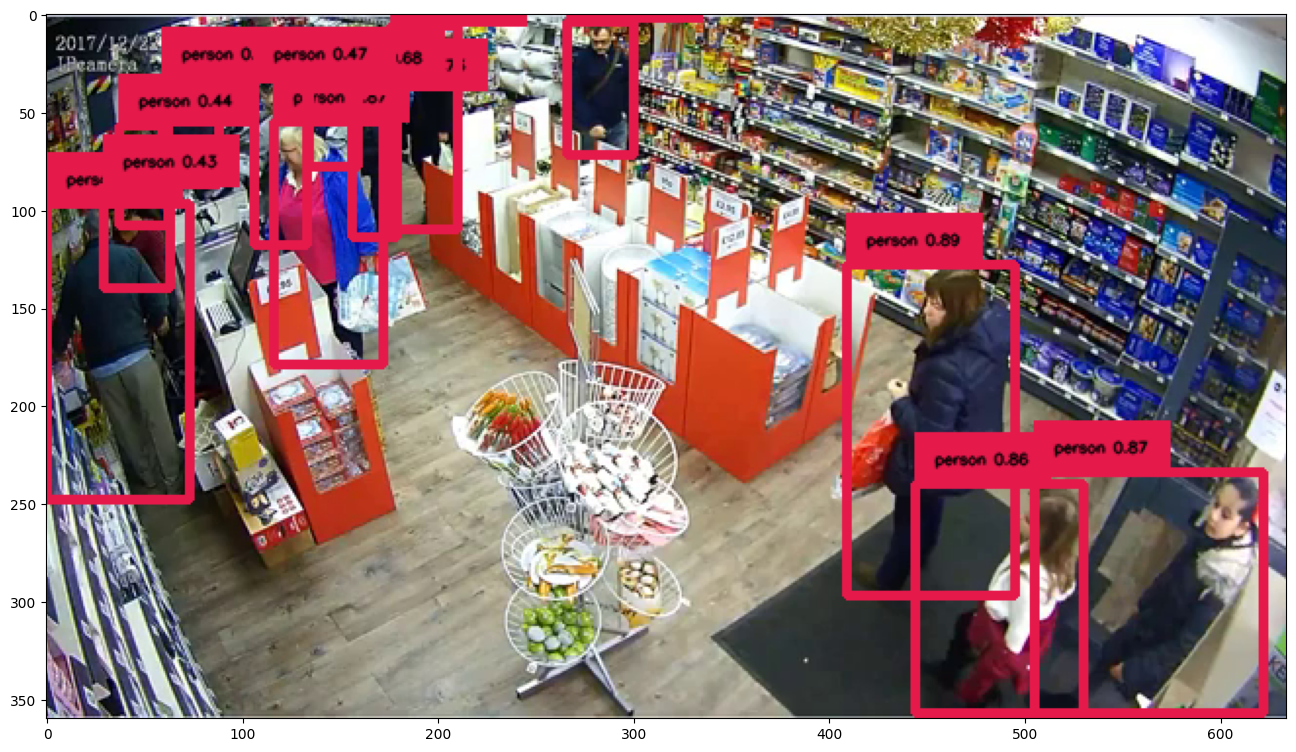

In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=1, text_scale=.25)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)

detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)

print('ok')
#print(results[0].boxes.conf.cpu().numpy())
#print(results[0].boxes.cls.cpu().numpy().astype(int))
#print(detections.class_id)



person_mask = detections.class_id == 0

filtered_detections = detections.filter(person_mask)



# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
    if CLASS_NAMES_DICT[class_id] == 'person'

]
# annotate and display frame


#print('test')
#print(labels)
frame = box_annotator.annotate(frame=frame, detections=filtered_detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

## Predict and annotate whole video

In [ ]:
# settings
from supervision.geometry.dataclasses import Point

#LINE_START = Point(50, 1500)
#LINE_END = Point(3840-50, 1500)

#LINE_START = Point(400, 360) #changed from 50 to 500
#LINE_END = Point(634, 200) #changed y from 150 to 80

LINE_START = Point(470, 0)
LINE_END = Point(470, 360)

TARGET_VIDEO_PATH = f"{HOME}/store_camera-result.mp4"

In [ ]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)


VideoInfo(width=634, height=360, fps=13, total_frames=1283)

In [ ]:
fps = VideoInfo.from_video_path(SOURCE_VIDEO_PATH).fps #frame per sec
total_frames = VideoInfo.from_video_path(SOURCE_VIDEO_PATH).total_frames # total frames
time_per_frame = 1/fps #gives you time per frame
frame_times = [frame_idx / fps for frame_idx in range(total_frames)]

frame_times[1282]

98.61538461538461

In [ ]:
from typing import Dict

import cv2
import numpy as np

from supervision.draw.color import Color
from supervision.geometry.dataclasses import Point, Rect, Vector
from supervision.tools.detections import Detections


class LineCounter:
    def __init__(self, start: Point, end: Point):
        """
        Initialize a LineCounter object.

        :param start: Point : The starting point of the line.
        :param end: Point : The ending point of the line.
        """
        self.vector = Vector(start=start, end=end)
        self.tracker_state: Dict[str, bool] = {}
        self.in_count: int = 0
        self.out_count: int = 0

    def update(self, detections: Detections):
        """
        Update the in_count and out_count for the detections that cross the line.

        :param detections: Detections : The detections for which to update the counts.
        """
        for xyxy, confidence, class_id, tracker_id in detections:
            # handle detections with no tracker_id
            if tracker_id is None:
                continue

            # we check if all four anchors of bbox are on the same side of vector
            x1, y1, x2, y2 = xyxy
            anchors = [
                Point(x=x1, y=y1),
                Point(x=x1, y=y2),
                Point(x=x2, y=y1),
                Point(x=x2, y=y2),
            ]
            triggers = [self.vector.is_in(point=anchor) for anchor in anchors]
            #print('trig')
            #print(len(set(triggers)))
            # detection is partially in and partially out
            if len(set(triggers)) == 2:
                continue

            tracker_state = triggers[0]
            # handle new detection
            if tracker_id not in self.tracker_state:
                self.tracker_state[tracker_id] = tracker_state
                continue

            # handle detection on the same side of the line
            if self.tracker_state.get(tracker_id) == tracker_state:
                continue

            self.tracker_state[tracker_id] = tracker_state
            if tracker_state:
                #self.in_count += 1
                self.out_count += 1
            else:
                #self.out_count += 1
                self.in_count += 1


class LineCounterAnnotator:
    def __init__(
        self,
        thickness: float = 2,
        color: Color = Color.white(),
        text_thickness: float = 2,
        text_color: Color = Color.black(),
        text_scale: float = 0.5,
        text_offset: float = 1.5,
        text_padding: int = 10,
    ):
        """
        Initialize the LineCounterAnnotator object with default values.

        :param thickness: float : The thickness of the line that will be drawn.
        :param color: Color : The color of the line that will be drawn.
        :param text_thickness: float : The thickness of the text that will be drawn.
        :param text_color: Color : The color of the text that will be drawn.
        :param text_scale: float : The scale of the text that will be drawn.
        :param text_offset: float : The offset of the text that will be drawn.
        :param text_padding: int : The padding of the text that will be drawn.
        """
        self.thickness: float = thickness
        self.color: Color = color
        self.text_thickness: float = text_thickness
        self.text_color: Color = text_color
        self.text_scale: float = text_scale
        self.text_offset: float = text_offset
        self.text_padding: int = text_padding

    def annotate(self, frame: np.ndarray, line_counter: LineCounter) -> np.ndarray:
        """
        Draws the line on the frame using the line_counter provided.

        :param frame: np.ndarray : The image on which the line will be drawn
        :param line_counter: LineCounter : The line counter that will be used to draw the line
        :return: np.ndarray : The image with the line drawn on it
        """
        cv2.line(
            frame,
            line_counter.vector.start.as_xy_int_tuple(),
            line_counter.vector.end.as_xy_int_tuple(),
            self.color.as_bgr(),
            self.thickness,
            lineType=cv2.LINE_AA,
            shift=0,
        )
        cv2.circle(
            frame,
            line_counter.vector.start.as_xy_int_tuple(),
            radius=5,
            color=self.text_color.as_bgr(),
            thickness=-1,
            lineType=cv2.LINE_AA,
        )
        cv2.circle(
            frame,
            line_counter.vector.end.as_xy_int_tuple(),
            radius=5,
            color=self.text_color.as_bgr(),
            thickness=-1,
            lineType=cv2.LINE_AA,
        )

        in_text = f"in: {line_counter.in_count}"
        out_text = f"out: {line_counter.out_count}"

        (in_text_width, in_text_height), _ = cv2.getTextSize(
            in_text, cv2.FONT_HERSHEY_SIMPLEX, self.text_scale, self.text_thickness
        )
        (out_text_width, out_text_height), _ = cv2.getTextSize(
            out_text, cv2.FONT_HERSHEY_SIMPLEX, self.text_scale, self.text_thickness
        )

        in_text_x = int(
            (line_counter.vector.end.x + line_counter.vector.start.x - in_text_width)
            / 2
        )
        in_text_y = int(
            (line_counter.vector.end.y + line_counter.vector.start.y + in_text_height)
            / 2
            - self.text_offset * in_text_height
        )

        out_text_x = int(
            (line_counter.vector.end.x + line_counter.vector.start.x - out_text_width)
            / 2
        )
        out_text_y = int(
            (line_counter.vector.end.y + line_counter.vector.start.y + out_text_height)
            / 2
            + self.text_offset * out_text_height
        )

        in_text_background_rect = Rect(
            x=in_text_x,
            y=in_text_y - in_text_height,
            width=in_text_width,
            height=in_text_height,
        ).pad(padding=self.text_padding)
        out_text_background_rect = Rect(
            x=out_text_x,
            y=out_text_y - out_text_height,
            width=out_text_width,
            height=out_text_height,
        ).pad(padding=self.text_padding)

        cv2.rectangle(
            frame,
            in_text_background_rect.top_left.as_xy_int_tuple(),
            in_text_background_rect.bottom_right.as_xy_int_tuple(),
            self.color.as_bgr(),
            -1,
        )
        cv2.rectangle(
            frame,
            out_text_background_rect.top_left.as_xy_int_tuple(),
            out_text_background_rect.bottom_right.as_xy_int_tuple(),
            self.color.as_bgr(),
            -1,
        )

        cv2.putText(
            frame,
            in_text,
            (in_text_x, in_text_y),
            cv2.FONT_HERSHEY_SIMPLEX,
            self.text_scale,
            self.text_color.as_bgr(),
            self.text_thickness,
            cv2.LINE_AA,
        )
        cv2.putText(
            frame,
            out_text,
            (out_text_x, out_text_y),
            cv2.FONT_HERSHEY_SIMPLEX,
            self.text_scale,
            self.text_color.as_bgr(),
            self.text_thickness,
            cv2.LINE_AA,
        )


In [ ]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
#box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
#line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)
#box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=1, text_scale=.25)

box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=1, text_scale=.25)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=1, text_scale=.25)

list_detections = []
# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )


        # filtering out detections with unwanted classes
        #mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)

        person_mask = detections.class_id == 0

        detections = detections.filter(person_mask)

        list_detections.append(detections.__len__())


        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
            if CLASS_NAMES_DICT[class_id] == 'person'
        ]

        # updating line counter

        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/1283 [00:00<?, ?it/s]


0: 384x640 13 persons, 2 handbags, 3 bowls, 1 dining table, 63.7ms
Speed: 2.6ms preprocess, 63.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 persons, 2 handbags, 3 bowls, 1 dining table, 63.2ms
Speed: 3.0ms preprocess, 63.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 persons, 2 handbags, 3 bowls, 1 dining table, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 persons, 2 handbags, 3 bowls, 1 dining table, 44.6ms
Speed: 2.3ms preprocess, 44.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 persons, 2 handbags, 3 bowls, 1 dining table, 44.4ms
Speed: 2.5ms preprocess, 44.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 persons, 2 handbags, 3 bowls, 1 dining table, 44.4ms
Speed: 2.1ms preprocess, 44.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x64

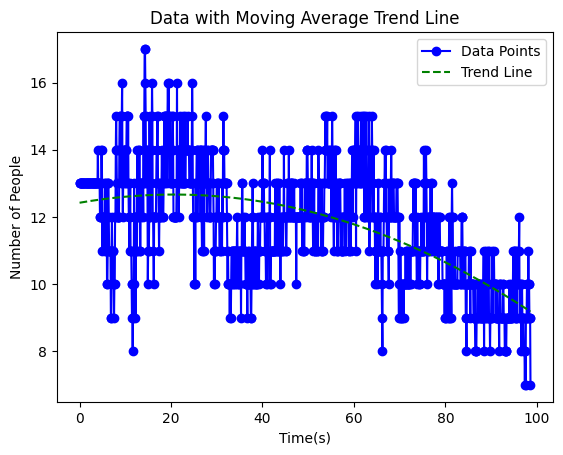

In [ ]:

import matplotlib.pyplot as plt

x = frame_times
y = list_detections

#plt.plot(x, y, marker='o', linestyle='-', color='b')
#plt.xlabel('Time(seconds)')
#plt.ylabel('Number of people in the Store')
#plt.title('Total Visitors In the Shop Over Time')
#plt.show()
import numpy as np
import matplotlib.pyplot as plt

def plot_lists_with_trend(list1, list2, degree, window_size):
    # Calculate moving average trend line
    trend = np.polyfit(list1, list2, degree)
    trend_poly = np.poly1d(trend)
    moving_average = np.convolve(list2, np.ones(window_size)/window_size, mode='valid')

    # Plot the lists and trend line
    plt.plot(list1, list2, marker='o', linestyle='-', color='b', label='Data Points')
    #plt.plot(list1[window_size-1:], moving_average, linestyle='-', color='r', label='Moving Average')
    plt.plot(list1, trend_poly(list1), linestyle='--', color='g', label='Trend Line')

    plt.xlabel('Time(s)')
    plt.ylabel('Number of People')
    plt.title('Data with Moving Average Trend Line')
    plt.legend()
    plt.show()

# Example usage:

degree = 2
window_size = 3
plot_lists_with_trend(x, y, degree, window_size)





In [ ]:

TARGET_VIDEO_PATH = f"{HOME}/Object Detection - Living Room -result.mp4"
SOURCE_VIDEO_PATH = f"{HOME}/Object Detection - Living Room .mp4"

In [ ]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
#line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
#box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
#line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)
#box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=1, text_scale=.25)

box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=1, text_scale=.25)
#line_annotator = LineCounterAnnotator(thickness=4, text_thickness=1, text_scale=.25)

list_detections = []
# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )


        # filtering out detections with unwanted classes
        #mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)

        person_mask = detections.class_id == 0

        detections = detections.filter(person_mask)

        list_detections.append(detections.__len__())


        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
            if CLASS_NAMES_DICT[class_id] == 'person'
        ]

        # updating line counter

        #line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        #line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/2129 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
0: 384x640 1 person, 6 chairs, 1 couch, 1 dining table, 1 tv, 1 book, 30.0ms
Speed: 4.6ms preprocess, 30.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 6 chairs, 1 couch, 1 dining table, 1 tv, 1 book, 30.3ms
Speed: 2.8ms preprocess, 30.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 6 chairs, 1 couch, 1 dining table, 1 tv, 1 book, 30.0ms
Speed: 4.4ms preprocess, 30.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 7 chairs, 1 couch, 1 dining table, 1 tv, 1 book, 30.4ms
Speed: 2.7ms preprocess, 30.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 7 chairs, 1 couch, 1 dining table, 1 tv, 1 book, 29.4ms
Speed: 2.8ms preprocess, 29.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 7 chairs, 1 couch, 1 dining table, 1 tv, 1 book, 29.7